
Original Sample Counts:
The table shows the frequencies of schizophrenic patients - at a 15 year follow up - who were either psychotic or nonpsychotic
and either taking antipsychotic medication or taking no psychiatric medication.


,psychotic,nonpsychotic,total
antipsychotic medication,25,14,39
no psychiatric medication,6,14,20
total,31,28,59


(Harrow & Jobe, 2007); https://journals.lww.com/jonmd/Fulltext/2007/05000/Factors_Involved_in_Outcome_and_Recovery_in.7.aspx


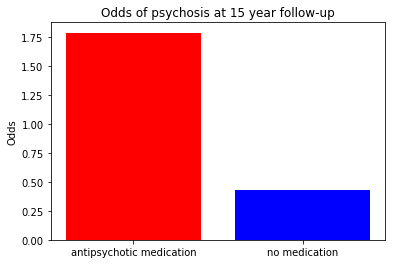

Sample Odds Ratio: 4.166666666666667

Sample Log Odds Ratio: 1.4271163556401458


Resampling under H0: no association between antipsychotic treament and psychosis at 15 year follow up


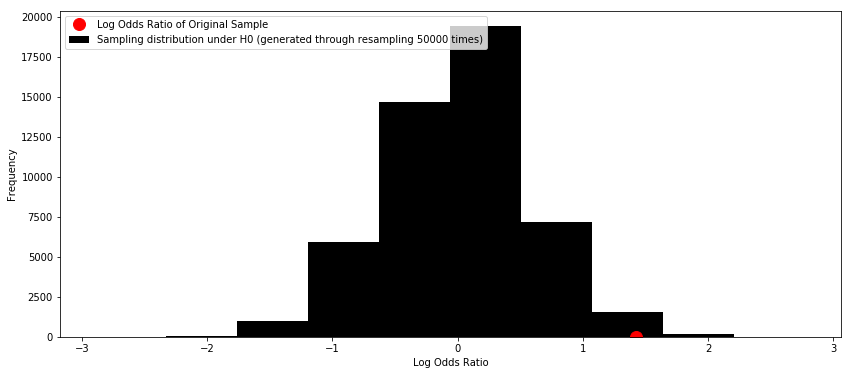

Probability, obtained from resampling under H0, of obtaining a log odds ratio as extreme the one from the original sample = 0.01752



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# This Guardian newspaper article (https://www.theguardian.com/commentisfree/2008/mar/02/mythoftheantipsychotic) makes the 
# following claim:


# '[A] US study last year in the Journal of Nervous and Mental Disease reported that people diagnosed with schizophrenia 
# and not taking antipsychotics are more likely to recover than those on the drugs. The study was on 145 patients, and 
# researchers reported that, after 15 years, 65% of patients on antipsychotics were psychotic, whereas only 28% of those not 
#  medication were psychotic. A staggering finding, surely? So where were the mainstream media yelps of "breakthrough in 
# schizophrenia treatment". Not a squeak.'


# The claim in the Guardian article is slightly misleading. The sample characteristics are different to what 
# Guardian article implies. Here is the actual paper: 
# https://journals.lww.com/jonmd/Fulltext/2007/05000/Factors_Involved_in_Outcome_and_Recovery_in.7.aspx

# The report from the actual study - on which the claim in the Guardian article is based - is:

# 'Sixty-four percent of the schizophrenia patients treated with antipsychotic medications at the 15-year follow-ups 
# had psychotic activity, whereas 28% of those not on any medications had signs of psychotic activity 
# (χ2 = 6.27, 1 df, p < .01).' (Harrow & Jobe, 2007)


# Here are the actual sample characteristics:

# total number of participants
n_sample = 145


# number of participants who had schizophrenia
n_schizo = 64


# number of participants with schizophrenia taking no psychiatric medication at 15 year follow up
n_schizo_no_med = 20


# number of participants with schizophrenia taking antipsychotic medication at 15 year follow up
n_schizo_antipsych = 39


# number of participants with schizophrenia taking no psychiatric medication who WERE psychotic at 15 year follow up
n_schizo_no_med_psychot = np.round(n_schizo_no_med * 0.28)


# number of participants with schizophrenia taking no psychiatric medication who were NOT psychotic at 15 year follow up
n_schizo_no_med_non_psychot = n_schizo_no_med - n_schizo_no_med_psychot


# number of participants with schizophrenia taking antipsychotic medication who WERE psychotic at 15 year follow up
n_schizo_antipsych_psychot = np.round(n_schizo_antipsych * 0.64)


# number of participants with schizophrenia taking antipsychotic medication who were NOT psychotic at 15 year follow up
n_schizo_antipsych_non_psychot = n_schizo_antipsych  - n_schizo_antipsych_psychot


# creating a table with the sample counts

sample_counts = pd.DataFrame(index = ['antipsychotic medication','no psychiatric medication','total'], 
                             columns = ['psychotic','nonpsychotic', 'total'])

sample_counts.iloc[0,0] = n_schizo_antipsych_psychot
sample_counts.iloc[0,1] =  n_schizo_antipsych_non_psychot
sample_counts.iloc[1,0] = n_schizo_no_med_psychot
sample_counts.iloc[1,1] = n_schizo_no_med_non_psychot

sample_counts.iloc[0,2] = sample_counts.iloc[0,0] + sample_counts.iloc[0,1]
sample_counts.iloc[1,2] = sample_counts.iloc[1,0] + sample_counts.iloc[1,1]
sample_counts.iloc[2,0] = sample_counts.iloc[0,0] + sample_counts.iloc[1,0]
sample_counts.iloc[2,1] = sample_counts.iloc[0,1] + sample_counts.iloc[1,1]
sample_counts.iloc[2,2] = sample_counts.iloc[2,0] + sample_counts.iloc[2,1] 


print()
print('Original Sample Counts:')
print('The table shows the frequencies of schizophrenic patients - at a 15 year follow up - who were either psychotic or nonpsychotic')
print('and either taking antipsychotic medication or taking no psychiatric medication.')
display(sample_counts)    
print('(Harrow & Jobe, 2007); https://journals.lww.com/jonmd/Fulltext/2007/05000/Factors_Involved_in_Outcome_and_Recovery_in.7.aspx')

# calculating the odds of psychosis given antipsychotic medication, the odds of psychosis given no medication, and the (log)
# odds ratio of those two odds

odds_psychosis_giv_antipsychot = n_schizo_antipsych_psychot/n_schizo_antipsych_non_psychot

odds_psychosis_giv_no_med = n_schizo_no_med_psychot/n_schizo_no_med_non_psychot

sample_odds_ratio = (odds_psychosis_giv_antipsychot) / (odds_psychosis_giv_no_med)

sample_log_odds_ratio = np.log(sample_odds_ratio)


# plotting the odds for each group

plt.figure(0)
plt.bar(['antipsychotic medication', 'no medication'],
       [odds_psychosis_giv_antipsychot,odds_psychosis_giv_no_med], color = ['red','blue'])
plt.title('Odds of psychosis at 15 year follow-up')
plt.ylabel('Odds')
plt.show()

print('Sample Odds Ratio:', sample_odds_ratio)
print()
print('Sample Log Odds Ratio:', sample_log_odds_ratio)
print()



# using resampling to createa sampling distribution under h0: no association between treament and psychosis at 15 year follow up
# e.g. the proportion of individuals with psychosis at 15 year follow up is the same in both groups

n_iterations = 50000

print()
print('Resampling under H0: no association between antipsychotic treament and psychosis at 15 year follow up')


resamp_log_odds_ratios = np.array([])

n_treated = sample_counts.iloc[0,2] # the total number of participants in the antipsychotic group

n_untreated = sample_counts.iloc[1,2] # the total number of participants in the 'no medication' group


for i in np.arange(n_iterations):
    
    antipsych = np.array([])
    
    no_med = np.array([])
    
    prop_psychotic = sample_counts.iloc[2,0]/sample_counts.iloc[2,2] # the total proportion of the sample who had psychosis

    p = prop_psychotic
    
# simulating groups of treated and untreated patients where patients in each group have the same probability of being
# psychotic or nonpsychotic (i.e. the treatment has no effect)
    
    for i in np.arange(n_treated):
        antipsych = np.append(antipsych, np.random.choice(['psychotic', 'nonpsychotic'], p = [p, 1-p]))
    
    for i in np.arange(n_untreated):
        no_med = np.append(no_med, np.random.choice(['psychotic', 'nonpsychotic'], p = [p, 1-p]))
    
    n_antipsych_psychot = len(antipsych[antipsych == 'psychotic'])
    
    n_antipsych_non_psychot = len(antipsych[antipsych == 'nonpsychotic'])
    
    n_no_med_psychot = len(no_med[no_med == 'psychotic'])
    
    n_no_med_non_psychot = len(no_med[no_med == 'nonpsychotic'])
    
# adding 0.5 to potential 0 counts
    
    if n_antipsych_psychot == 0:
        n_antipsych_psychot = 0.5
        
    if n_antipsych_non_psychot == 0:
        n_antipsych_non_psychot = 0.5
        
    if n_no_med_psychot == 0:
        n_no_med_psychot = 0.5
        
    if n_no_med_non_psychot == 0:
        n_no_med_non_psychot  = 0.5
        
# calculating the odds and log odds ratios for the simulated group, and appending the result to the resampling distribution 
    
    odds_psychot_giv_antipsych = n_antipsych_psychot/n_antipsych_non_psychot
    
    odds_psychot_giv_no_med = n_no_med_psychot/n_no_med_non_psychot
    
    log_odds_ratio = np.log(odds_psychot_giv_antipsych/odds_psychot_giv_no_med)
    
    resamp_log_odds_ratios = np.append(resamp_log_odds_ratios,log_odds_ratio)
    
    
# plotting the log odds resampling distribution and the original log odds ratio

plt.figure(3, figsize = (14,6))
plt.hist(resamp_log_odds_ratios, color = 'black', 
         label = 'Sampling distribution under H0 (generated through resampling '+str(n_iterations)+' times)')
plt.plot(sample_log_odds_ratio, 0, 'o', color = 'red', markersize = 12, label = 'Log Odds Ratio of Original Sample')
plt.legend(loc = 'upper left')
plt.ylabel('Frequency')
plt.xlabel('Log Odds Ratio')
plt.show()


# counting all resampled log odds ratio more extreme than that obtained in the original sample

more_extreme_positive = len(resamp_log_odds_ratios[resamp_log_odds_ratios >= sample_log_odds_ratio])
more_extreme_negative = len(resamp_log_odds_ratios[resamp_log_odds_ratios <= -sample_log_odds_ratio])

more_extreme = more_extreme_positive + more_extreme_negative
total = len(resamp_log_odds_ratios)

p_value = more_extreme/total

print('Probability, obtained from resampling under H0, of obtaining a log odds ratio as extreme the one from the original sample =', p_value)
print()

